In [209]:
import sys

# This project requires Python 3.7 or above
assert sys.version_info >=(3,7)

In [210]:
# this project requires Scikit-Learn ≥ 1.0.1
from packaging import version
import sklearn
assert version.parse(sklearn.__version__)>=version.parse('1.0.1')

## Get the data


In [211]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [212]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") #以.tar.gz为扩展名的是一种压缩文件，在linux和osx下常见，linux和osx都可以直接解压使用这种压缩文件。windows下的winrar也可以使用。相当于常见的rar和zip格式
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


When ``load_housing_data()`` is called, it looks for the datasets/housing.tgz file. If it does not find it, it creates the datasets directory inside the current directory (which is /content by default, in Colab), downloads the housing.tgz file from the ageron/data GitHub repository, and extracts its content into the datasets directory; this creates the datasets/housing directory with the housing.csv file inside it. Lastly, the function loads this CSV file into a Pandas DataFrame object containing all the data, and returns it.

## Take a Quick Look at the Data Structure

In [213]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [214]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Findings 1: There are 20,640 instances in the dataset, which means that it is fairly small by machine learning standards, but it’s perfect to get started. You notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. You will need to take care of this later.

Finding2 : All attributes are numerical, except for ocean_proximity. Its type is object, so it could hold any kind of Python object. But since you loaded this data from a CSV file, you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [215]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [216]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are.⁠5 The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).

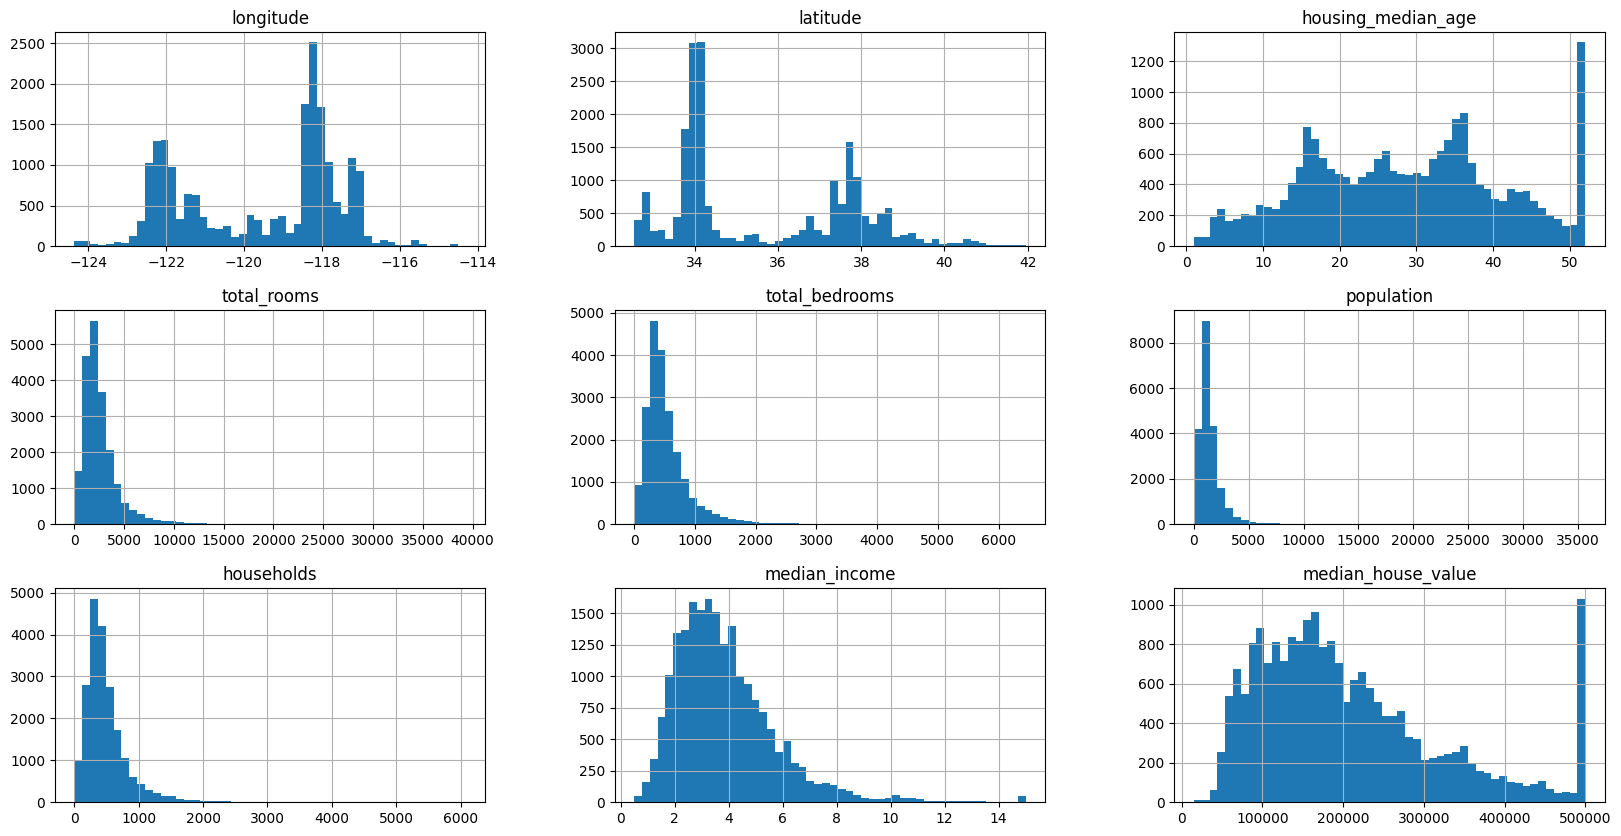

In [217]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 10))
plt.show()

First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in machine learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your machine learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:

Collect proper labels for the districts whose labels were capped.

Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

Finally, many histograms are skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, you’ll try transforming these attributes to have more symmetrical and bell-shaped distributions.

## Create a Test Set

Creating a test set is theoretically simple; pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside

In [218]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffle_indices=np.random.permutation(len(data))
    test_data_size=int(len(data)*test_ratio)
    test_data_indices=shuffle_indices[0:test_data_size]
    training_data_indices=shuffle_indices[test_data_size:]
    return data.iloc[training_data_indices], data.iloc[test_data_indices]


In [219]:
shuffle_indices=np.random.permutation(len(housing))
shuffle_indices[0:10]

array([ 5621, 12970, 19301, 19433, 18852,  8299, 11064, 12931, 12292,
       12548])

In [220]:
train_set, test_set=shuffle_and_split_data(housing, 0.2)
train_set.shape

(16512, 10)

In [221]:
test_set.shape

(4128, 10)

Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your machine learning algorithms) will get to see the whole dataset, which is what you want to avoid

One solution is to save the test set on the first run and then load it in subsequent runs. Another option is to set the random number generator’s seed (e.g., with np.random.seed(42))⁠6 before calling np.random.permutation() so that it always generates the same shuffled indices.

However, both these solutions will break the next time you fetch an updated dataset. To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have unique and immutable identifiers). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [222]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

![](./pics/crc32.jpg)

Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

In [223]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [238]:
housing_with_id.head(9)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16


In [239]:
train_set[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
17848,-122.49,37.79,52.0,2488.0,281.0,805.0,295.0,10.7058,500001.0,NEAR BAY
6252,-123.38,41.80,25.0,1941.0,477.0,1000.0,390.0,2.2976,54400.0,INLAND
9389,-118.41,34.29,32.0,1591.0,320.0,1818.0,306.0,4.2969,145800.0,<1H OCEAN
6113,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,173400.0,INLAND
6061,-122.66,38.47,23.0,2246.0,437.0,1035.0,386.0,3.7617,172600.0,<1H OCEAN


In [240]:
test_set[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
13311,-121.76,36.92,36.0,2096.0,409.0,1454.0,394.0,3.2216,238300.0,<1H OCEAN
7113,-120.45,34.91,16.0,712.0,147.0,355.0,162.0,2.5600,150000.0,<1H OCEAN
7668,-117.86,33.79,31.0,3523.0,922.0,2660.0,949.0,3.1792,146400.0,<1H OCEAN
18246,-117.43,33.91,15.0,14281.0,2511.0,7540.0,2245.0,4.3222,138000.0,INLAND
5723,-118.18,34.13,44.0,2734.0,415.0,1057.0,424.0,7.9213,477800.0,<1H OCEAN


If you use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so you could combine them into an ID like so:

In [227]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [241]:
train_set[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
17848,-122.49,37.79,52.0,2488.0,281.0,805.0,295.0,10.7058,500001.0,NEAR BAY
6252,-123.38,41.80,25.0,1941.0,477.0,1000.0,390.0,2.2976,54400.0,INLAND
9389,-118.41,34.29,32.0,1591.0,320.0,1818.0,306.0,4.2969,145800.0,<1H OCEAN
6113,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,173400.0,INLAND
6061,-122.66,38.47,23.0,2246.0,437.0,1035.0,386.0,3.7617,172600.0,<1H OCEAN


In [242]:
test_set[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
13311,-121.76,36.92,36.0,2096.0,409.0,1454.0,394.0,3.2216,238300.0,<1H OCEAN
7113,-120.45,34.91,16.0,712.0,147.0,355.0,162.0,2.5600,150000.0,<1H OCEAN
7668,-117.86,33.79,31.0,3523.0,922.0,2660.0,949.0,3.1792,146400.0,<1H OCEAN
18246,-117.43,33.91,15.0,14281.0,2511.0,7540.0,2245.0,4.3222,138000.0,INLAND
5723,-118.18,34.13,44.0,2734.0,415.0,1057.0,424.0,7.9213,477800.0,<1H OCEAN


Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), which does pretty much the same thing as the shuffle_and_split_data() function we defined earlier, with a couple of additional features. First, there is a random_state parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels):

In [230]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. When employees at a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population, with regard to the questions they want to ask. For example, the US population is 51.1% females and 48.9% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 511 females and 489 males (at least if it seems possible that the answers may vary across genders). This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. If the people running the survey used purely random sampling, there would be about a 10.7% chance of sampling a skewed test set with less than 48.5% female or more than 53.5% female participants. Either way, the survey results would likely be quite biased.

Suppose you’ve chatted with some experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely: most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code uses the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5); category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on.

In [231]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
#Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of ages ranges

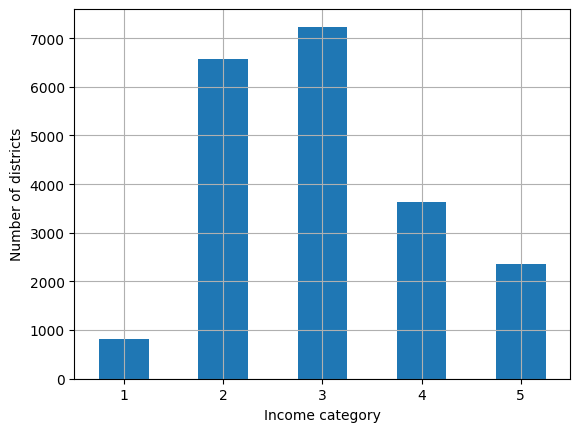

In [246]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Now you are ready to do stratified sampling based on the income category. Scikit-Learn provides a number of splitter classes in the sklearn.model_selection package that implement various strategies to split your dataset into a training set and a test set. Each splitter has a split() method that returns an iterator over different training/test splits of the same data

To be precise, the split() method yields the training and test indices, not the data itself. Having multiple splits can be useful if you want to better estimate the performance of your model, as you will see when we discuss cross-validation later in this chapter. For example, the following code generates 10 different stratified splits of the same dataset

In [233]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

For now, you can just use the first split:

In [234]:
strat_train_set, strat_test_set = strat_splits[0]

Or, since stratified sampling is fairly common, there’s a shorter way to get a single split using the train_test_split() function with the stratify argument:

In [235]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [254]:
strat_train_set.shape

(16512, 10)

Let’s see if this worked as expected. You can start by looking at the income category proportions in the test set

In [236]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

With similar code you can measure the income category proportions in the full dataset. Figure 2-10 compares the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling. As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

In [248]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [251]:
test_set["income_cat"]=pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [253]:
test_set["income_cat"].value_counts() / len(test_set)

3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: income_cat, dtype: float64

![](./pics/stratified.jpg)

You won’t use the income_cat column again, so you might as well drop it, reverting the data back to its original state

In [237]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)